# EDA

In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Sampling from DataFrames

Sampling is important because you can never use the entire data from EDA. 
- Datasets are very large in some cases.
- Saving datasets for testing
- We may want to oversample and undersample data (dataset used should be indicative of the real-data)

In [67]:
import os

This snippet uses Kaggle CLI to imoprt dataset from Kaggle unzip it and delete the residual .zip file

In [68]:
#!/bin/bash
!kaggle datasets download arshid/iris-flower-dataset --path data/
!unzip data/iris-flower-dataset.zip -d data/ -n
!rm data/iris-flower-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/arshid/iris-flower-dataset
License(s): CC0-1.0
  0%|                                               | 0.00/0.99k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 0.99k/0.99k [00:00<00:00, 1.06MB/s]
Archive:  data/iris-flower-dataset.zip
caution: filename not matched:  -n


In [69]:
data = pd.read_csv('data/IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [70]:
### BEGIN SOLUTION
# Number of rows
print(data.shape[0])

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)
### END SOLUTION

150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

In [71]:
data['species'] = data.species.str.replace('Iris-', '')
# data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

In [72]:
data.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [73]:
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

In [74]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [75]:
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [76]:
data.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

Text(0.5, 1.0, 'Scatter Plot')

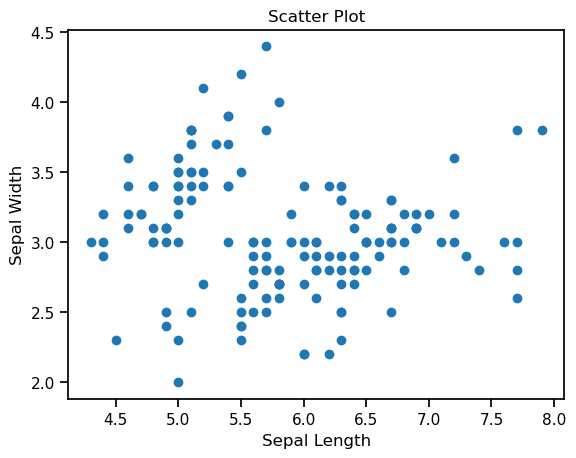

In [77]:
plt.scatter(data.sepal_length, data.sepal_width)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot')

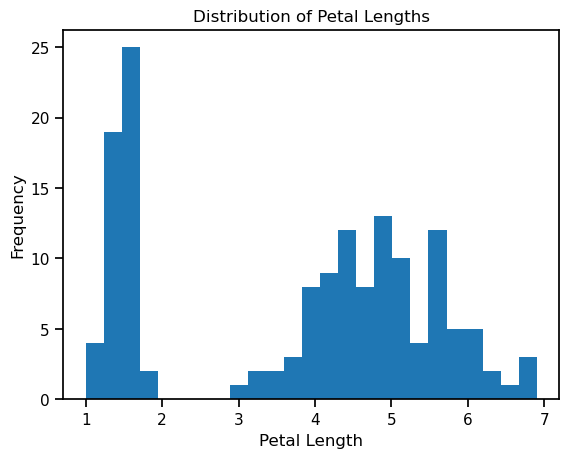

In [78]:
plt.hist(data.petal_length, bins=25)
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.title('Distribution of Petal Lengths')
plt.show()

Text(0.5, 0, 'Size cm')

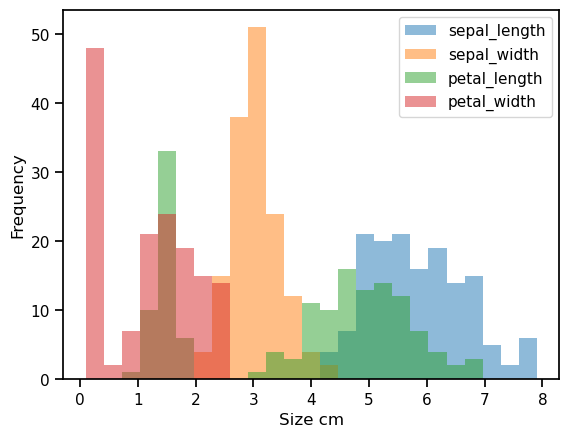

In [85]:
# for more complicated graphs we use Seaborne
# sns.histplot(data, bins=25, alpha=0.5)

data.plot.hist(bins=25, alpha=0.5)
plt.xlabel('Size cm')

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

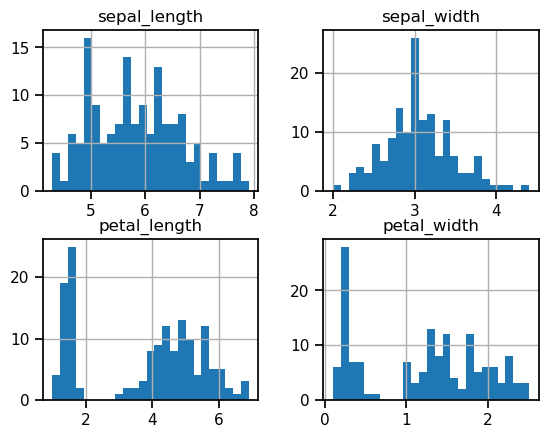

In [80]:
# for creating seperate plots use pandas.hist()
data.hist(bins=25)

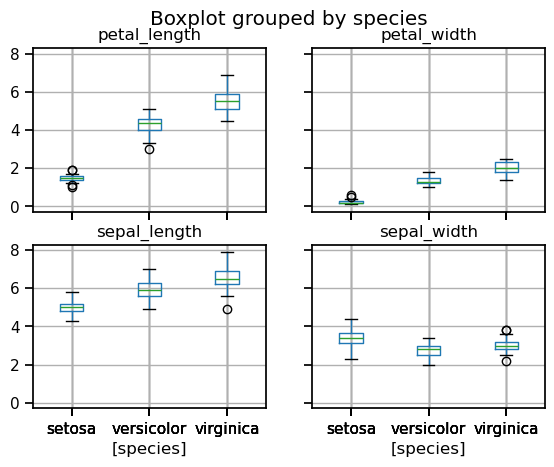

In [81]:
data.boxplot(by='species')
plt.show()

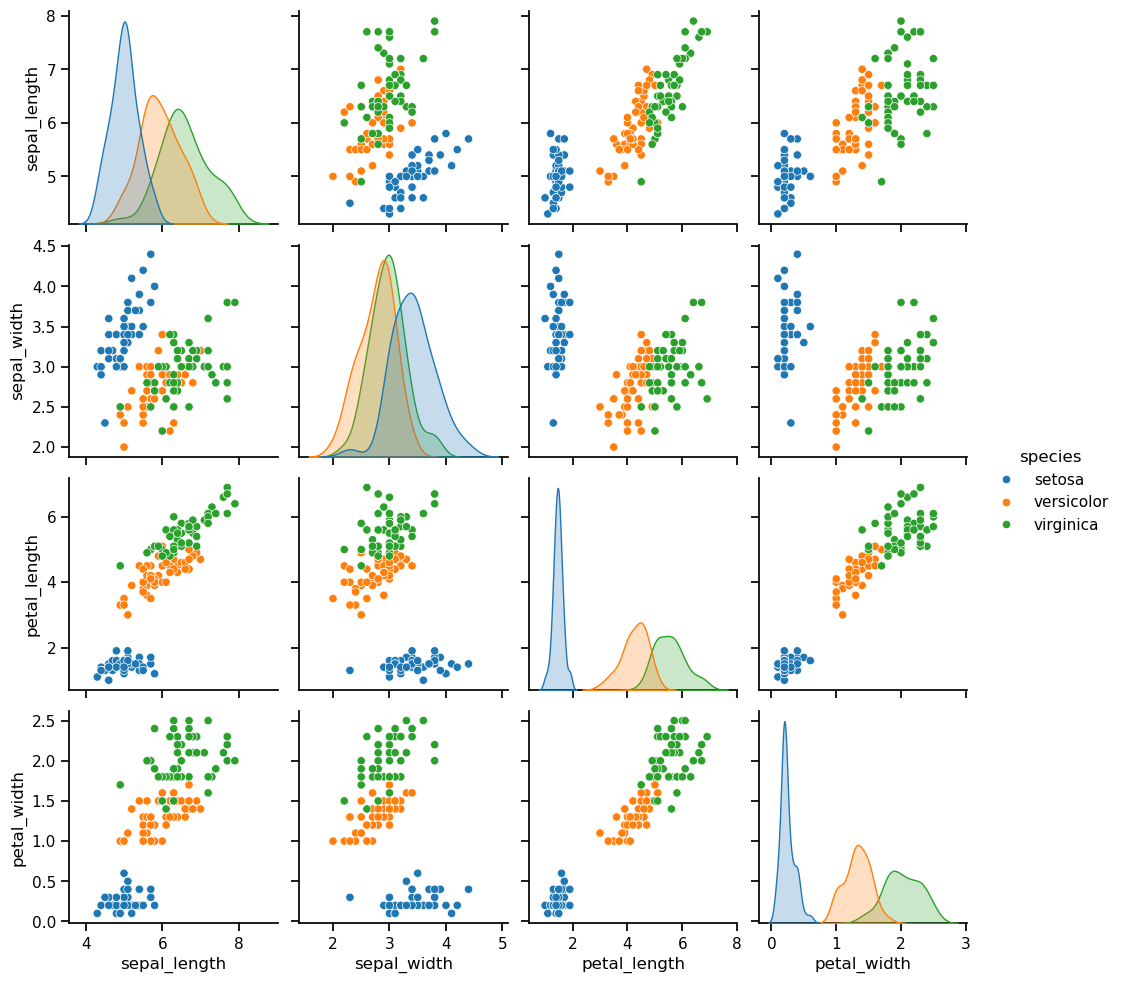

In [82]:
sns.pairplot(data, hue='species')